In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
toyo=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
toyo.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


## Data Understanding

In [3]:
toyo.shape

(1436, 38)

In [4]:
toyo.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [5]:
toyo.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

## Data Preperation

In [6]:
toyo2=pd.concat([toyo.iloc[:,2:4],toyo.iloc[:,6:7],toyo.iloc[:,8:9],toyo.iloc[:,12:14],toyo.iloc[:,15:18]],axis=1)


In [7]:
toyo3=toyo2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyo3.drop_duplicates(inplace=True)
toyo3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
toyo3.shape

(1435, 9)

In [9]:
toyo3.dtypes

Price     int64
Age       int64
KM        int64
HP        int64
CC        int64
Doors     int64
Gears     int64
QT        int64
Weight    int64
dtype: object

## Model Building

In [10]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo3).fit()

## Model Testing

In [11]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS              Adj. R-squared:     0.862     
Dependent Variable:  Price            AIC:                24750.4072
Date:                2022-07-22 11:15 BIC:                24797.8275
No. Observations:    1435             Log-Likelihood:     -12366.   
Df Model:            8                F-statistic:        1118.     
Df Residuals:        1426             Prob (F-statistic): 0.00      
R-squared:           0.863            Scale:              1.8004e+06
--------------------------------------------------------------------
            Coef.     Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
Intercept -5472.5404 1412.1688  -3.8753 0.0001 -8242.6916 -2702.3891
Age        -121.7139    2.6146 -46.5519 0.0000  -126.8427  -116.5850
KM           -0.0207    0.0013 -16.5524 0.0000    -0.0232    -0.0183
HP           31.5846    2.8176  11.2097 0.0000    26.0575    37.1117
CC           -0.1186    0.0901  -1.3164 0.1882    -0.2952     0.0581
Doors        -0.9202   39.9882  -0.0230 0.9816   -79.3622    77.5218
Gears       597.7159  196.9694   3.0346 0.0025   211.3351   984.0967
QT            3.8588    1.3106   2.9442 0.0033     1.2878     6.4298
Weight       16.8555    1.0695  15.7607 0.0000    14.7576    18.9534
--------------------------------------------------------------------
Omnibus:              149.666       Durbin-Watson:          1.544   
Prob(Omnibus):        0.000         Jarque-Bera (JB):       1000.538
Skew:                 -0.204        Prob(JB):               0.000   
Kurtosis:             7.070         Condition No.:          3129620 
====================================================================
* The condition number is large (3e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

In [12]:
slr_c=smf.ols('Price~CC',data=toyo3).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [13]:
slr_d=smf.ols('Price~Doors',data=toyo3).fit()
slr_d.tvalues , slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [14]:
mlr_cd=smf.ols('Price~CC+Doors',data=toyo3).fit()
mlr_cd.tvalues , mlr_cd.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

## Model Deletion Diagnostics (checking Outliers or Influencers)

### Two Techniques : 1. Cook's Distance & 2. Leverage value

###### 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
###### Get influencers using cook's distance

In [15]:
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

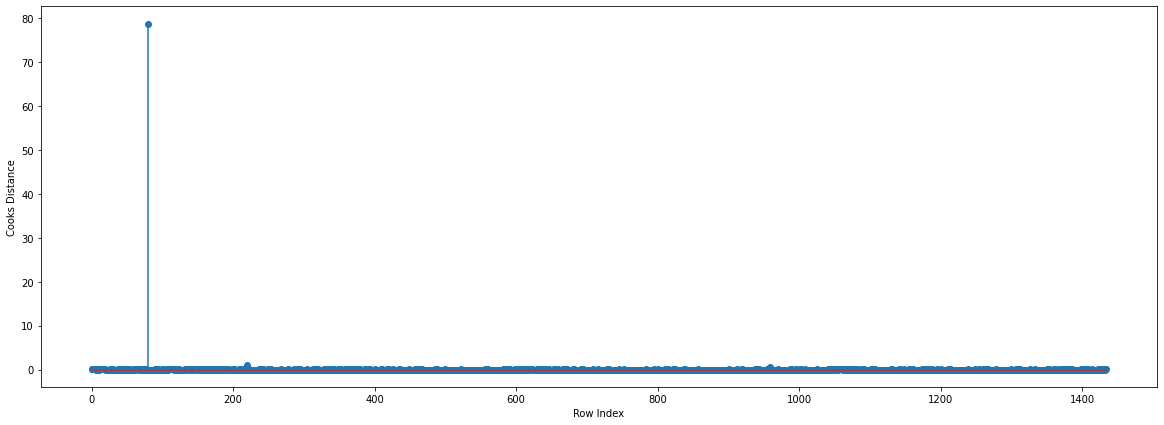

In [16]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyo3)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [17]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.72950582249176)

In [18]:
from statsmodels.graphics.regressionplots import influence_plot

###### 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

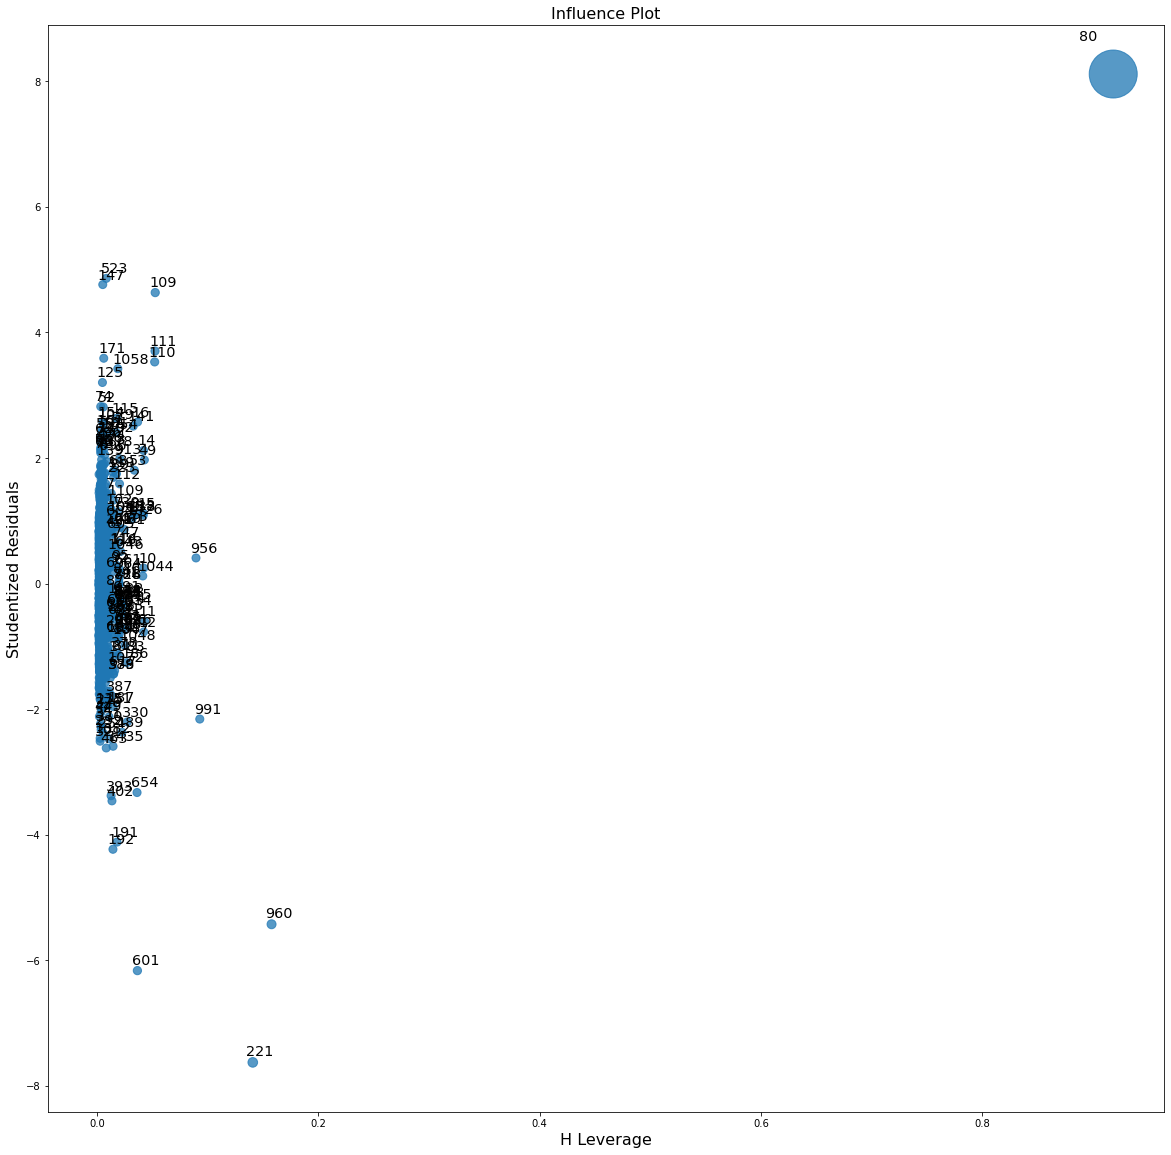

In [19]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [20]:
k=toyo3.shape[1]
n=toyo3.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [21]:
toyo3[toyo3.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## Improving the Model

In [22]:
toyo_new=toyo3.copy()
toyo_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


###### Dropping the data point which is a influencer & reassigning the row number

In [23]:
toyo4=toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index(drop=True)
toyo4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


## Model Deletion Diagnostics and Final Model

In [24]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo4).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyo4=toyo4.drop(toyo4.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyo4
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo4).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared.round(2))

Thus model accuracy is improved to 0.89


In [25]:
final_model.rsquared

0.8882395145171202

## Model Prediction

In [26]:
new_data=pd.DataFrame({'Age':[12],"KM":[40000],"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


##### Manual Prediction of Price

In [27]:
final_model.predict(new_data)

0    14341.570181
dtype: float64

##### Automatic Prediction of Price with 90.02% accurcy


In [28]:
pred_y=final_model.predict(toyo4)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64

## Table Containing R^2 Values for each prepared Model

In [29]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.883968
1,Final_Model,0.888240
